# Introduction #
In this exercise, you’ll learn how to improve training outcomes by including an early stopping callback to prevent overfitting.
When you're ready, run this next cell to set everything up!

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex4 import *

/tmp/ipykernel_34/1500229236.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('../input/dl-course-data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

2025-04-26 09:26:35.062607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-26 09:26:35.062746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-26 09:26:35.192869: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Input shape: [18]


I0000 00:00:1745659607.253195      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Minimum Validation Loss: 0.2009


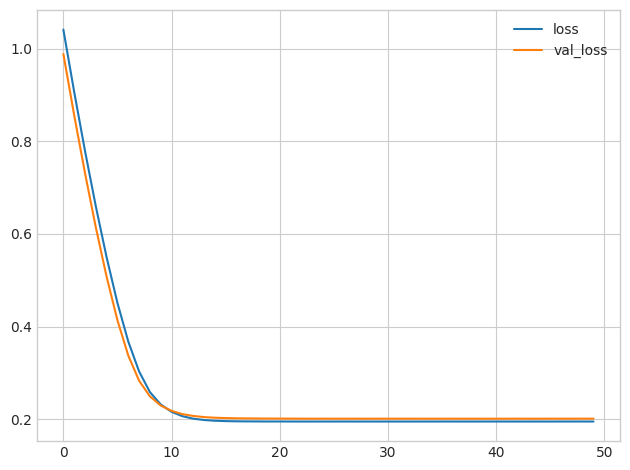

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.2009


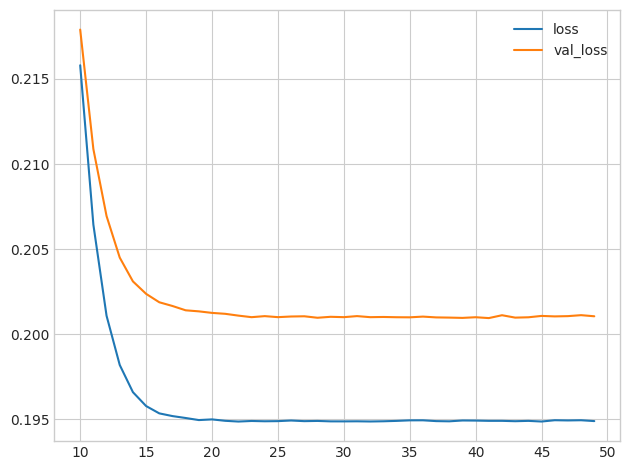

In [ ]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The gap between these curves is quite small and the validation loss never increases, so it's more likely that the network is underfitting than overfitting. It would be worth experimenting with more capacity to see if that's the case.

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.2390 - val_loss: 0.2130
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1988 - val_loss: 0.2064
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1939 - val_loss: 0.2046
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1908 - val_loss: 0.2047
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1891 - val_loss: 0.2032
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1874 - val_loss: 0.2016
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1866 - val_loss: 0.2030
Epoch 8/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1859 - val_loss: 0.2025
Epoch 9/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1840 - val_loss: 0.2045
Epoch 10/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1831 - val_loss: 0.2015
Epoch 11/50
48/48 [

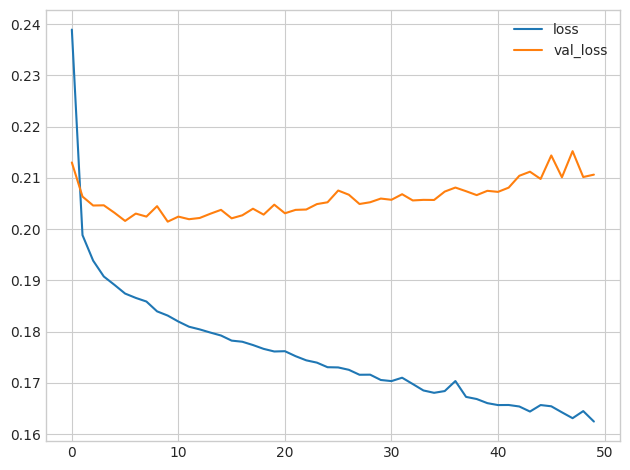

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
# 2) Add Capacity
What is your evaluation of these curves? Underfitting, overfitting, just right?

In [ ]:
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Now the validation loss begins to rise very early, while the training loss continues to decrease. This indicates that the network has begun to overfit. At this point, we would need to try something to prevent it, either by reducing the number of units or through a method like early stopping. (We'll see another in the next lesson!)

In [ ]:
# 3) Define Early Stopping Callback
Now define an early stopping callback that waits 5 epochs (`patience'`) for a change in validation loss of at least `0.001` (`min_delta`) and keeps the weights with the best loss (`restore_best_weights`).

In [ ]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience=5,           
    min_delta=0.001,      
    restore_best_weights=True, 
)
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Epoch 1/50
48/48 [==============================] - 1s 5ms/step - loss: 0.2170 - val_loss: 0.2125
Epoch 2/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1979 - val_loss: 0.2050
Epoch 3/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1930 - val_loss: 0.2032
Epoch 4/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1904 - val_loss: 0.2031
Epoch 5/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1883 - val_loss: 0.2024
Epoch 6/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1868 - val_loss: 0.2038
Epoch 7/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1853 - val_loss: 0.2019
Epoch 8/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1842 - val_loss: 0.2019
Epoch 9/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1835 - val_loss: 0.2023
Epoch 10/50
48/48 [==============================] - 0s 3ms/step - loss: 0.1823 - val_loss: 0.2027
Epoch 11/50
48/48 [

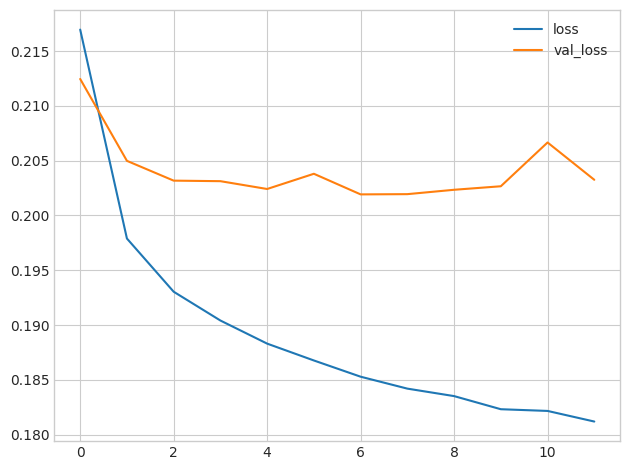

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
# 4) Train and Interpret

In [ ]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The early stopping callback did stop the training once the network began overfitting. Moreover, by including `restore_best_weights` we still get to keep the model where validation loss was lowest.